In [ ]:
from datasets import load_dataset

dataset = load_dataset("mteb/banking77")
print(dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/294k [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/91.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9993 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/3076 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 9993
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 3076
    })
})


In [ ]:
import pandas as pd

train_df = pd.DataFrame(dataset["train"])
train_df

,text,label,label_text
0,I am still waiting on my card?,11,card_arrival
1,What can I do if my card still hasn't arrived ...,11,card_arrival
2,I have been waiting over a week. Is the card s...,11,card_arrival
3,Can I track my card while it is in the process...,11,card_arrival
4,"How do I know if I will get my card, or if it ...",11,card_arrival
...,...,...,...
9988,You provide support in what countries?,24,country_support
9989,What countries are you supporting?,24,country_support
9990,What countries are getting support?,24,country_support
9991,Are cards available in the EU?,24,country_support


In [ ]:
labels = train_df["label_text"].unique().tolist()
print("Total number of labels:", len(labels))
print(labels[:10])  # Print the first 10 labels

Total number of labels: 77
['card_arrival', 'card_linking', 'exchange_rate', 'card_payment_wrong_exchange_rate', 'extra_charge_on_statement', 'pending_cash_withdrawal', 'fiat_currency_support', 'card_delivery_estimate', 'automatic_top_up', 'card_not_working']


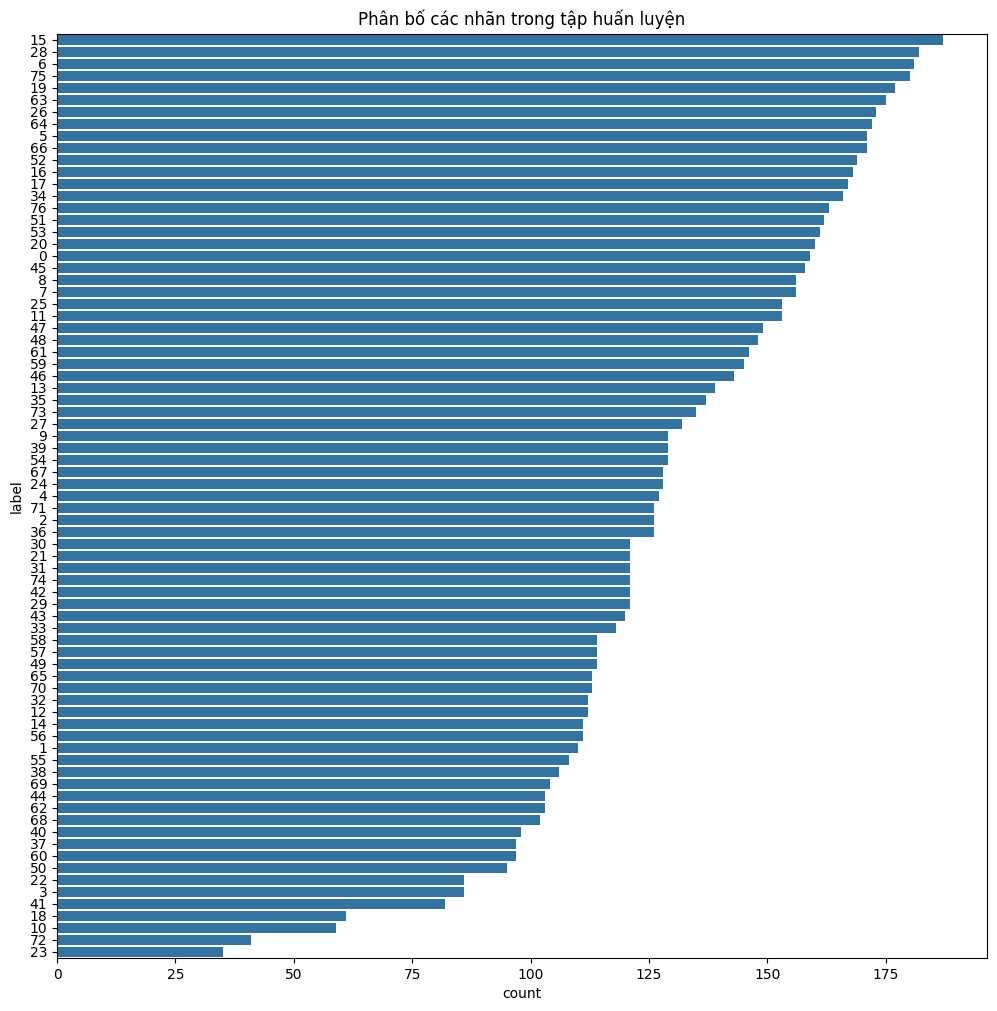

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.countplot(y="label", data=train_df, order=train_df['label'].value_counts().index)
plt.title("Phân bố các nhãn trong tập huấn luyện")
plt.show()

In [ ]:
train_df["length"] = train_df["text"].apply(lambda x: len(x.split()))
train_df["length"].describe()

,length
count,9993.000000
mean,11.955369
std,7.891187
min,3.000000
25%,7.000000
50%,10.000000
75%,13.000000
max,79.000000


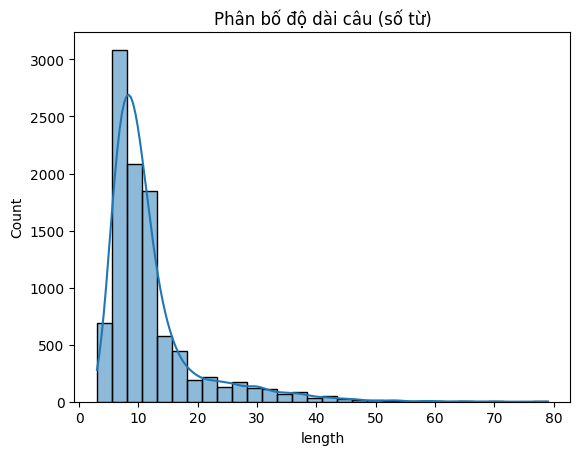

In [ ]:
sns.histplot(train_df["length"], bins=30, kde=True)
plt.title("Phân bố độ dài câu (số từ)")
plt.show()

In [ ]:
from collections import Counter
import re

all_words = " ".join(train_df["text"]).lower()
words = re.findall(r'\b[a-z]{3,}\b', all_words)  # bỏ stopword có thể thêm sau
counter = Counter(words)
print(counter.most_common(20))

[('the', 3497), ('card', 2681), ('can', 2067), ('for', 1581), ('what', 1542), ('how', 1524), ('why', 1368), ('account', 1352), ('you', 1225), ('and', 1215), ('money', 1132), ('was', 1090), ('transfer', 1083), ('top', 1045), ('that', 1018), ('have', 1000), ('not', 967), ('there', 925), ('this', 829), ('get', 808)]


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(train_df["text"][:1000])  # thử 1000 mẫu
print(embeddings.shape)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(1000, 384)


#train = 9993, #labels = 77


Batches:   0%|          | 0/79 [00:00<?, ?it/s]

embeddings: (9993, 384)
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9993 samples in 0.002s...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 9993 samples in 8.437s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9993
[t-SNE] Computed conditional probabilities for sample 2000 / 9993
[t-SNE] Computed conditional probabilities for sample 3000 / 9993
[t-SNE] Computed conditional probabilities for sample 4000 / 9993
[t-SNE] Computed conditional probabilities for sample 5000 / 9993
[t-SNE] Computed conditional probabilities for sample 6000 / 9993
[t-SNE] Computed conditional probabilities for sample 7000 / 9993
[t-SNE] Computed conditional probabilities for sample 8000 / 9993
[t-SNE] Computed conditional probabilities for sample 9000 / 9993
[t-SNE] Computed conditional probabilities for sample 9993 / 9993
[t-SNE] Mean sigma: 0.299735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.996559
[t-SNE] KL divergence after 1000 iterations: 0.923331


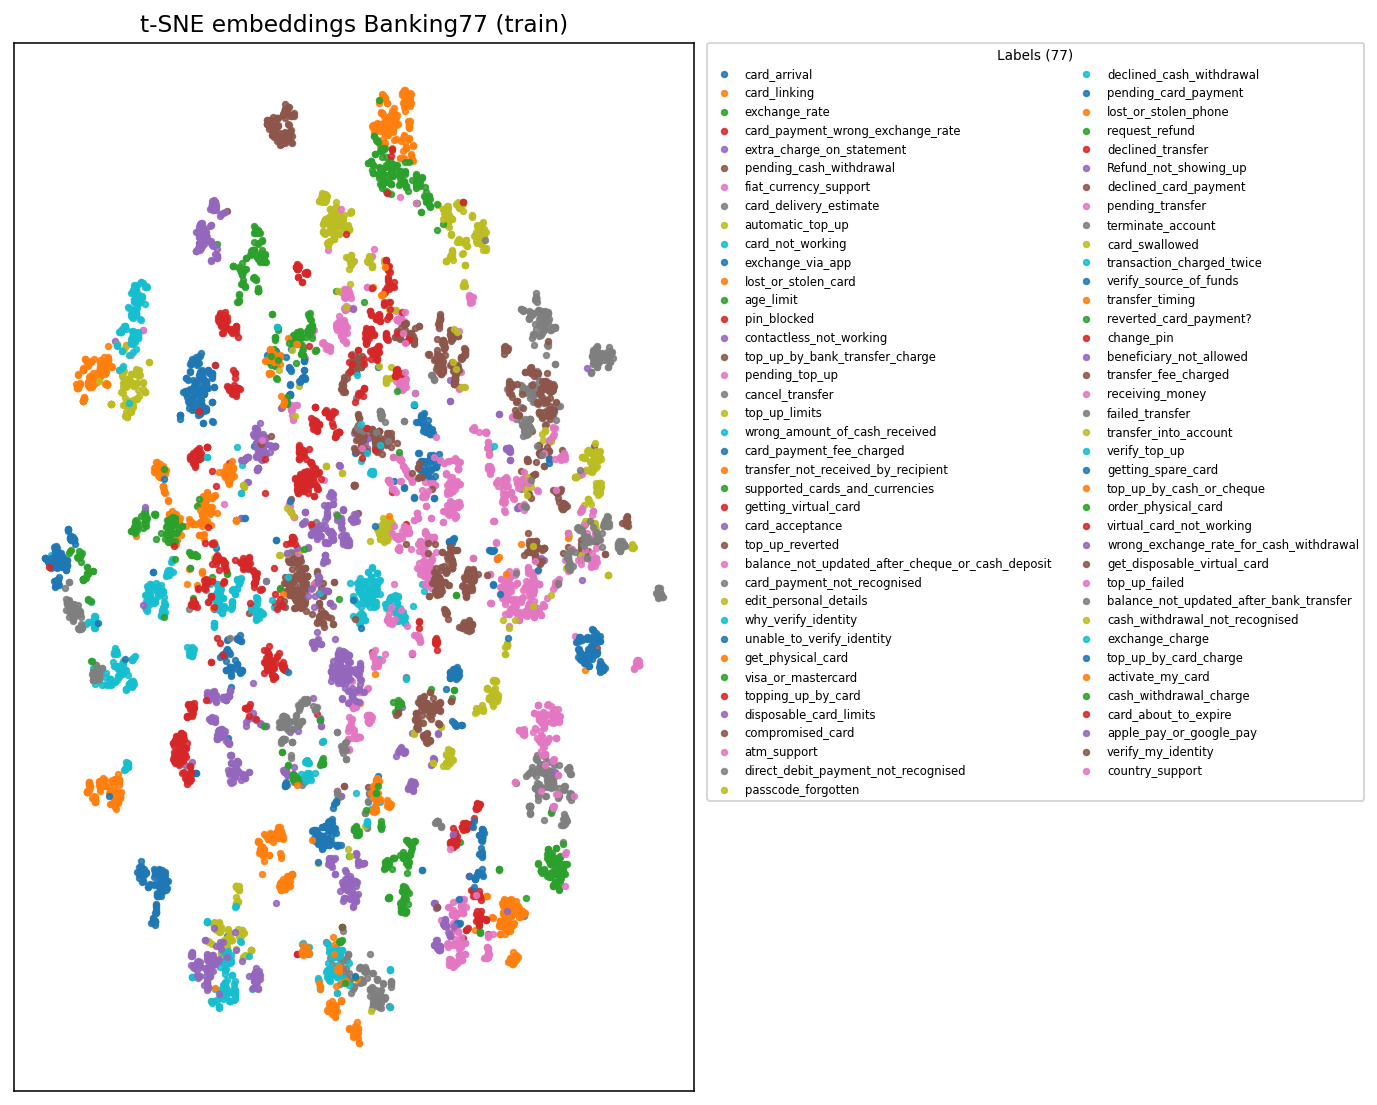

In [ ]:
# 1) Chuẩn bị
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import pandas as pd

# 2) Tải dataset & lấy tên nhãn
ds = load_dataset("mteb/banking77")
train = ds["train"]
texts = train["text"]
y = np.array(train["label"])

# Create a pandas DataFrame to easily get label names
train_df = pd.DataFrame(train)
label_names = train_df["label_text"].unique().tolist()

num_labels = len(label_names)
print(f"#train = {len(texts)}, #labels = {num_labels}")

# 3) Embed toàn bộ train
model = SentenceTransformer("all-MiniLM-L6-v2")  # nhanh, 384D
embeddings = model.encode(
    texts,
    batch_size=128,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=False,  # t-SNE không bắt buộc normalize
)
print("embeddings:", embeddings.shape)  # (N, D)

# 4) t-SNE (gợi ý cấu hình cho 10k điểm)
tsne = TSNE(
    n_components=2,
    init="pca",           # giúp ổn định hơn
    learning_rate="auto",
    perplexity=30,        # 30–50 thường hợp lý; tăng nếu RAM/CPU cho phép
    n_iter=1000,
    verbose=1,
    random_state=42
)
emb_2d = tsne.fit_transform(embeddings)

# 5) Vẽ scatter theo nhãn + legend tên nhãn
plt.figure(figsize=(10, 8), dpi=140)
# Vẽ từng nhãn để tạo legend rõ ràng
for idx, name in enumerate(label_names):
    mask = (y == idx)
    if np.any(mask):
        plt.scatter(
            emb_2d[mask, 0],
            emb_2d[mask, 1],
            s=8,
            alpha=0.85,
            label=name
        )

plt.title("t-SNE embeddings Banking77 (train)")
plt.xticks([]); plt.yticks([])

# Legend: đẩy ra ngoài, nhiều cột cho gọn
legend = plt.legend(
    title=f"Labels ({num_labels})",
    bbox_to_anchor=(1.02, 1), loc="upper left",
    borderaxespad=0.,
    fontsize=6, title_fontsize=7,
    ncol=2  # tăng lên 3–4 nếu bạn muốn ngắn hơn theo chiều dọc
)

plt.tight_layout()
plt.show()

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
example = tokenizer(train_df["text"][0])
print(example)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 1045, 2572, 2145, 3403, 2006, 2026, 4003, 1029, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("mteb/banking77")
train_df = pd.DataFrame(dataset["train"])
test_df  = pd.DataFrame(dataset["test"])

train_df.info()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        9993 non-null   object
 1   label       9993 non-null   int64 
 2   label_text  9993 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.3+ KB


,0
text,0
label,0
label_text,0
